<a href="https://colab.research.google.com/github/aSafarpoor/DIP/blob/main/DIP_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.signal as sig

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

# Q1

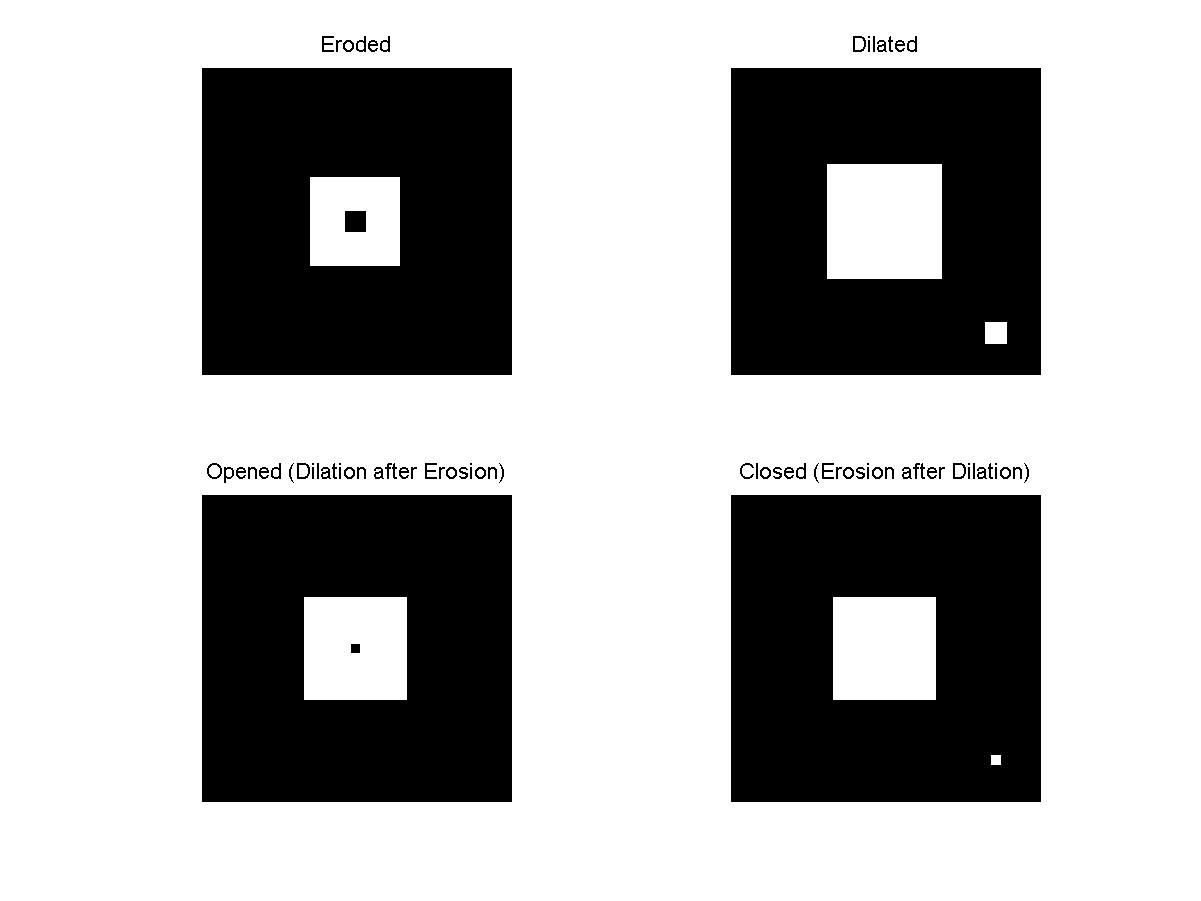

In [ ]:
ar = np.zeros((10,10))
ar[2,:] = 1
ar[:,5] = 1
ar [3:6,7:10] = 1
print(ar)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


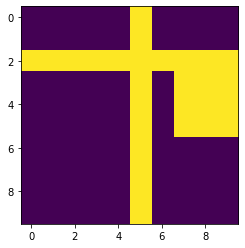

In [ ]:
imshow(ar)

In [90]:
class Q1:
    def normalization(self,img):
        img = np.copy(img)
        shape_ = img.shape
        img = img.reshape(-1)
        img = (img-min(img))/(max(img)-min(img))
        return img.reshape(shape_)

    def dilation(self,img,k_size=3):
        img = np.copy(img)
        img = self.normalization(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img>0]=1  
        img[img<0]=0  
        return img

    def erosion(self,img,k_size=3):
        img = np.copy(img)
        img = self.normalization(img)
        kernel = np.ones((k_size,k_size))
        img = sig.convolve2d(img, kernel, mode="same")
        img[img<k_size**2]=0
        img[img>0]=1
        return img
    
    def opening(self,img,k_size=3):
        img = np.copy(img)
        img = self.normalization(img)
        img = self.erosion(img)
        img = self.dilation(img)
        return img

    def closing(self,img,k_size=3):
        img = np.copy(img)
        img = self.normalization(img)
        img = self.dilation(img)
        img = self.erosion(img)
        return img

    def show_all_function_outputs(self,img):
        
        out1 = self.dilation(img)        
        out2 = self.erosion(img)        
        out3 = self.closing(img)        
        out4 = self.opening(img)        

        fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)
        ax0, ax00, ax1, ax2, ax3, ax4 = axes.flatten()
        ax0.imshow(img)
        ax0.set_title('original',fontsize=9)
        ax00.imshow(img)
        ax00.set_title('original',fontsize=9)
        ax1.imshow(out1)
        ax1.set_title('dilation',fontsize=9)
        ax2.imshow(out2)
        ax2.set_title('erosion',fontsize=9)
        ax3.imshow(out3)
        ax3.set_title('closing',fontsize=9)
        ax4.imshow(out4)
        ax4.set_title('opening',fontsize=9)

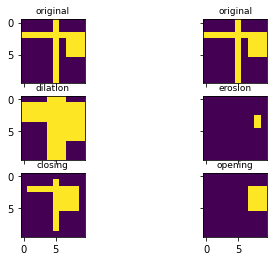

In [91]:
q1 = Q1()
q1.show_all_function_outputs(ar)